In [113]:
import os
print(os.getcwd())


/workspaces/taller/session-01/notebooks


In [114]:
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
df = pd.read_csv('../../datos/Base_Taller.csv',sep= ';')
df.head()

,Zona,Sede,Año,Mes,Ingresos,Costo_Operativo,Utilidad_Bruta,Gastos,Ut_Operacional,Empl_Admon,Empl_Operativo,Ordenes,Hrs_Reales,Hrs_Disponibles,Nivel_rentabilidad
0,Zona Antioquia,Medellín Alistamiento,2021,ene,130985262,75747717,55237545,22969352,32268193,0,11,297,725,1120,Media
1,Zona Antioquia,Medellín Alistamiento,2021,feb,153990095,60845429,93144666,15689387,77455279,1,10,342,924,960,Alta
2,Zona Antioquia,Medellín Alistamiento,2021,mar,202392276,82840534,119551742,17039667,102512075,1,10,592,1084,960,Alta
3,Zona Antioquia,Medellín Alistamiento,2021,abr,143886122,72250513,71635609,9173052,62462557,1,10,426,752,960,Alta
4,Zona Antioquia,Medellín Alistamiento,2021,may,110708724,63899043,46809681,14075570,32734111,1,10,297,544,960,Media


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2419 entries, 0 to 2418
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Zona                2419 non-null   object
 1   Sede                2419 non-null   object
 2   Año                 2419 non-null   int64 
 3   Mes                 2419 non-null   object
 4   Ingresos            2419 non-null   int64 
 5   Costo_Operativo     2419 non-null   int64 
 6   Utilidad_Bruta      2419 non-null   int64 
 7   Gastos              2419 non-null   int64 
 8   Ut_Operacional      2419 non-null   int64 
 9   Empl_Admon          2419 non-null   int64 
 10  Empl_Operativo      2419 non-null   int64 
 11  Ordenes             2419 non-null   int64 
 12  Hrs_Reales          2419 non-null   int64 
 13  Hrs_Disponibles     2419 non-null   int64 
 14  Nivel_rentabilidad  2419 non-null   object
dtypes: int64(11), object(4)
memory usage: 283.6+ KB


In [117]:
df.describe(include='all')

,Zona,Sede,Año,Mes,Ingresos,Costo_Operativo,Utilidad_Bruta,Gastos,Ut_Operacional,Empl_Admon,Empl_Operativo,Ordenes,Hrs_Reales,Hrs_Disponibles,Nivel_rentabilidad
count,2419,2419,2419.000000,2419,2.419000e+03,2.419000e+03,2.419000e+03,2.419000e+03,2.419000e+03,2419.000000,2419.000000,2419.000000,2419.000000,2419.000000,2419
unique,3,51,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,Demás Zonas,Medellín Alistamiento,NaN,sep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Baja
freq,1699,48,NaN,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1102
mean,NaN,NaN,2022.508888,NaN,2.399087e+08,1.223259e+08,1.175828e+08,9.304589e+07,2.453687e+07,7.044233,12.945845,356.932203,1547.751964,1797.879289,NaN
std,NaN,NaN,1.119154,NaN,1.974153e+08,1.048750e+08,1.005547e+08,7.397307e+07,5.587200e+07,6.293033,10.934119,248.958932,1542.268623,1555.214530,NaN
min,NaN,NaN,2021.000000,NaN,0.000000e+00,0.000000e+00,-8.357467e+07,8.695100e+04,-2.830368e+08,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,2022.000000,NaN,9.781749e+07,4.962630e+07,4.327737e+07,4.168123e+07,-3.850698e+06,3.000000,6.000000,162.000000,634.000000,750.000000,NaN
50%,NaN,NaN,2023.000000,NaN,1.937924e+08,9.520458e+07,9.741389e+07,7.575773e+07,1.536377e+07,5.000000,10.000000,328.000000,1186.000000,1440.000000,NaN
75%,NaN,NaN,2024.000000,NaN,3.111327e+08,1.508078e+08,1.597276e+08,1.221528e+08,4.440280e+07,9.000000,15.000000,481.000000,1843.000000,2150.000000,NaN


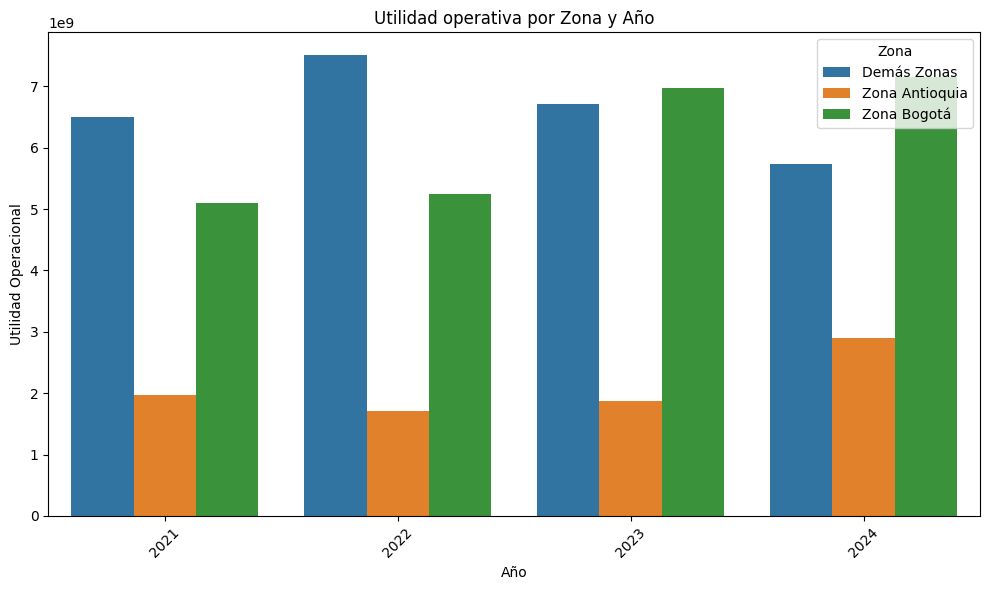

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../../datos/Base_Taller.csv',sep= ';')

utilidad_por_zona = df.groupby(['Zona', 'Año'])['Ut_Operacional'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=utilidad_por_zona, x='Año', y='Ut_Operacional', hue='Zona')

plt.title('Utilidad operativa por Zona y Año')
plt.ylabel('Utilidad Operacional')
plt.xlabel('Año')
plt.xticks(rotation=45)
plt.legend(title='Zona')
plt.tight_layout()
plt.show()

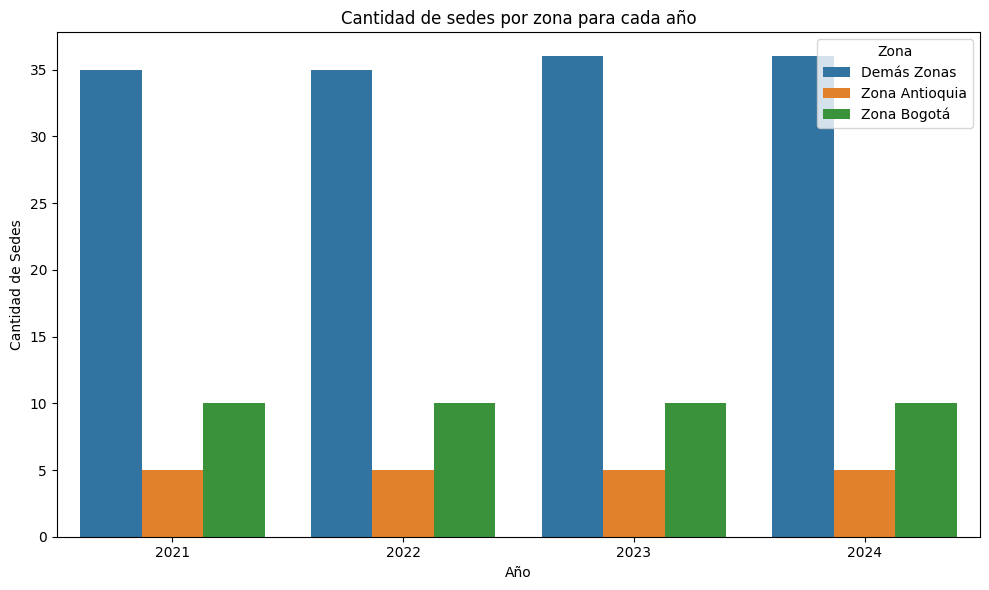

In [119]:
import pandas as pd
df = pd.read_csv('../../datos/Base_Taller.csv',sep= ';')

import matplotlib.pyplot as plt
import seaborn as sns

conteo_sedes = df.groupby(['Zona', 'Año'])['Sede'].nunique().reset_index()
conteo_sedes.rename(columns={'Sede': 'Cantidad de Sedes'}, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=conteo_sedes, x='Año', y='Cantidad de Sedes', hue='Zona')

plt.title('Cantidad de sedes por zona para cada año')
plt.ylabel('Cantidad de Sedes')
plt.xlabel('Año')
plt.legend(title='Zona')
plt.tight_layout()
plt.show()

*Interpretación: Este gráfico nos muestra cuántos casos hay por categoría de género en la base.*

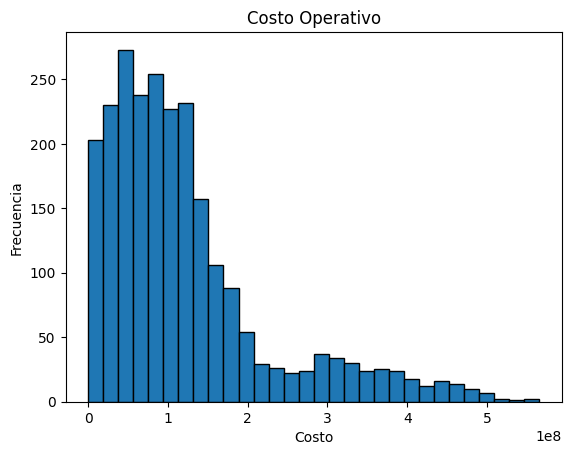

In [120]:
df['Costo_Operativo'].dropna().plot(kind='hist', bins=30, edgecolor='Black')
plt.title('Costo Operativo')
plt.xlabel('Costo')
plt.ylabel('Frecuencia')
plt.show()

*Interpretación: El histograma muestra la frecuencia del rango de costo de mano de obra. Los datos atípicos corresponden a los costos de sedes grandes cuya operación es mas robusta que las del promedio nacional*

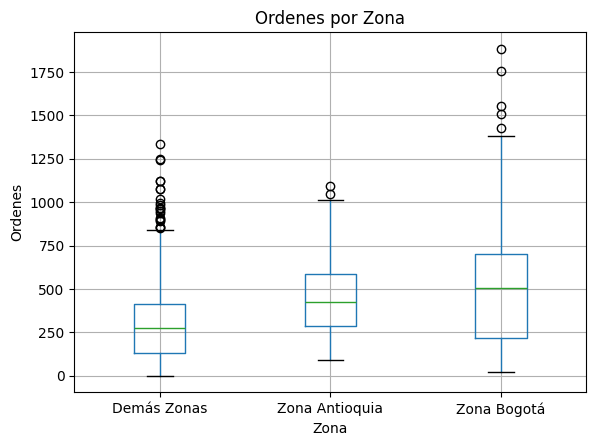

In [121]:
df.boxplot(column='Ordenes', by='Zona')
plt.title('Ordenes por Zona')
plt.suptitle('')
plt.xlabel('Zona')
plt.ylabel('Ordenes')
plt.show()

*Interpretación: El boxplot permite comparar la distribución del ingreso entre grupos de género, y detectar posibles outliers.*

In [122]:
# Cargar el dataset
df_raw = pd.read_csv('../../datos/Base_Taller.csv',sep= ';')


In [123]:
print(df.columns)

Index(['Zona', 'Sede', 'Año', 'Mes', 'Ingresos', 'Costo_Operativo',
       'Utilidad_Bruta', 'Gastos', 'Ut_Operacional', 'Empl_Admon',
       'Empl_Operativo', 'Ordenes', 'Hrs_Reales', 'Hrs_Disponibles',
       'Nivel_rentabilidad'],
      dtype='object')


In [124]:
df_raw["Capacidad Real Hrs"] = (df_raw["Hrs_Disponibles"] > df_raw["Hrs_Reales"]).astype(int)
df_raw.head()

,Zona,Sede,Año,Mes,Ingresos,Costo_Operativo,Utilidad_Bruta,Gastos,Ut_Operacional,Empl_Admon,Empl_Operativo,Ordenes,Hrs_Reales,Hrs_Disponibles,Nivel_rentabilidad,Capacidad Real Hrs
0,Zona Antioquia,Medellín Alistamiento,2021,ene,130985262,75747717,55237545,22969352,32268193,0,11,297,725,1120,Media,1
1,Zona Antioquia,Medellín Alistamiento,2021,feb,153990095,60845429,93144666,15689387,77455279,1,10,342,924,960,Alta,1
2,Zona Antioquia,Medellín Alistamiento,2021,mar,202392276,82840534,119551742,17039667,102512075,1,10,592,1084,960,Alta,0
3,Zona Antioquia,Medellín Alistamiento,2021,abr,143886122,72250513,71635609,9173052,62462557,1,10,426,752,960,Alta,1
4,Zona Antioquia,Medellín Alistamiento,2021,may,110708724,63899043,46809681,14075570,32734111,1,10,297,544,960,Media,1


In [125]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  

df_before = df_raw[["Ut_Operacional", "Ingresos"]].dropna()
Xb = df_before
yb = df_raw.loc[df_before.index, "Capacidad Real Hrs"]

Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.3, random_state=42)

model_before = LogisticRegression(max_iter=200)
model_before.fit(Xb_train, yb_train)
yb_pred = model_before.predict(Xb_test)
acc_before = accuracy_score(yb_test, yb_pred)

print("✅ Exactitud antes de la limpieza:", round(acc_before, 4))

✅ Exactitud antes de la limpieza: 0.7287


In [126]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

df_clean = df_raw.copy()

# Imputación
imputer_Hrs_Disponibles = SimpleImputer(strategy='median')
df_clean['Hrs_Disponibles'] = imputer_Hrs_Disponibles.fit_transform(df_clean[['Hrs_Disponibles']])

imputer_ingresos = SimpleImputer(strategy='mean')
df_clean['Ingresos'] = imputer_ingresos.fit_transform(df_clean[['Ingresos']])

# Escalado
scaler = MinMaxScaler()
df_clean[['Hrs_Disponibles', 'Ingresos']] = scaler.fit_transform(df_clean[['Hrs_Disponibles', 'Ingresos']])

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset limpio
df = pd.read_csv('../../datos/Base_Taller.csv',sep= ';')
df.head()

,Zona,Sede,Año,Mes,Ingresos,Costo_Operativo,Utilidad_Bruta,Gastos,Ut_Operacional,Empl_Admon,Empl_Operativo,Ordenes,Hrs_Reales,Hrs_Disponibles,Nivel_rentabilidad
0,Zona Antioquia,Medellín Alistamiento,2021,ene,130985262,75747717,55237545,22969352,32268193,0,11,297,725,1120,Media
1,Zona Antioquia,Medellín Alistamiento,2021,feb,153990095,60845429,93144666,15689387,77455279,1,10,342,924,960,Alta
2,Zona Antioquia,Medellín Alistamiento,2021,mar,202392276,82840534,119551742,17039667,102512075,1,10,592,1084,960,Alta
3,Zona Antioquia,Medellín Alistamiento,2021,abr,143886122,72250513,71635609,9173052,62462557,1,10,426,752,960,Alta
4,Zona Antioquia,Medellín Alistamiento,2021,may,110708724,63899043,46809681,14075570,32734111,1,10,297,544,960,Media


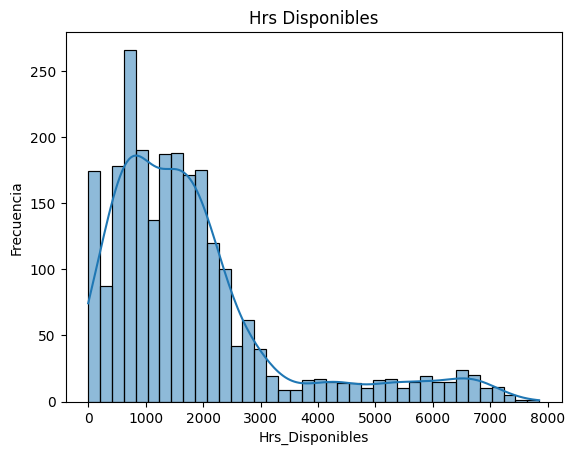

In [128]:
# Histograma de Capacidad de Horas
sns.histplot(df['Hrs_Disponibles'], kde=True)
plt.title('Hrs Disponibles')
plt.xlabel('Hrs_Disponibles')
plt.ylabel('Frecuencia')
plt.show()

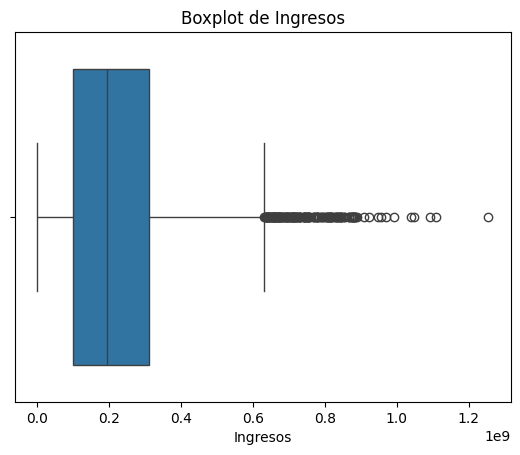

In [129]:
# Boxplot de Ingreso
sns.boxplot(x=df['Ingresos'])
plt.title('Boxplot de Ingresos')
plt.xlabel('Ingresos')
plt.show()

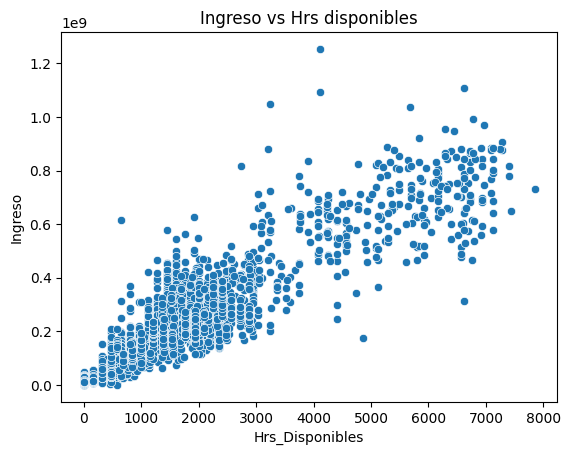

In [130]:
# Dispersión entre Edad e Ingreso
sns.scatterplot(x='Hrs_Disponibles', y='Ingresos', data=df)
plt.title('Ingreso vs Hrs disponibles')
plt.xlabel('Hrs_Disponibles')
plt.ylabel('Ingreso')
plt.show()

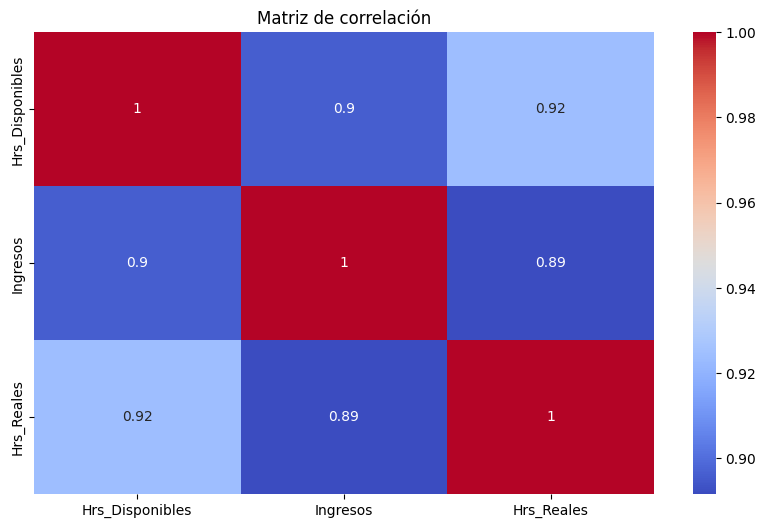

In [131]:
# Mapa de calor de correlaciones numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Hrs_Disponibles', 'Ingresos', 'Hrs_Reales']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

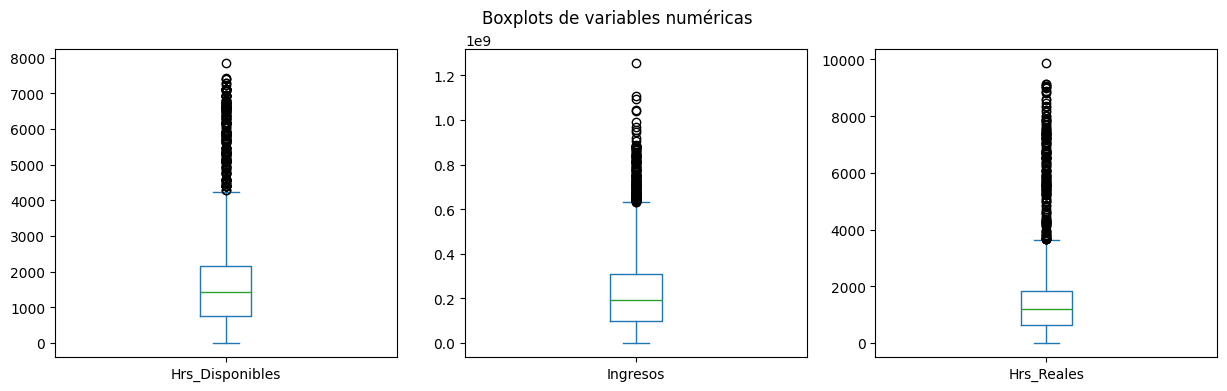

In [132]:
# Boxplot conjunto
df[['Hrs_Disponibles', 'Ingresos', 'Hrs_Reales']].plot(kind='box', subplots=True, layout=(1, 3), figsize=(15, 4))
plt.suptitle('Boxplots de variables numéricas')
plt.show()

In [133]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [134]:
# Cargar datos limpios
df = pd.read_csv('../../datos/Base_Taller_Limpia.csv',sep= ';')

In [135]:
X = df.drop(columns=['Capac_Hrs', 'Capacidad Real Hrs'])
y = df['Capacidad Real Hrs']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [137]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Alinear columnas en caso de que falte alguna categoría en test o train
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [138]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [139]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [140]:
print("Exactitud:", round(accuracy_score(y_test, y_pred), 4))
print(classification_report(y_test, y_pred))

Exactitud: 0.7713
              precision    recall  f1-score   support

           0       0.64      0.49      0.55       211
           1       0.81      0.89      0.85       515

    accuracy                           0.77       726
   macro avg       0.72      0.69      0.70       726
weighted avg       0.76      0.77      0.76       726



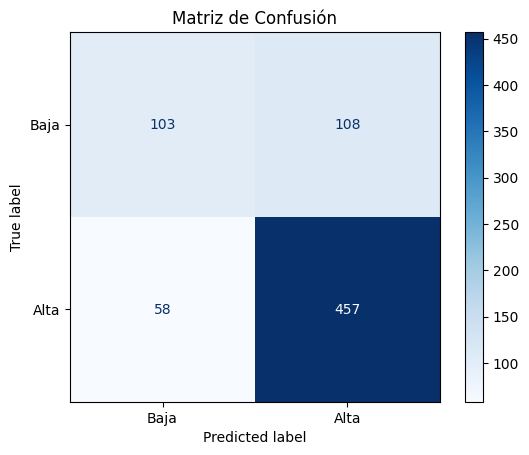

In [141]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Baja", "Alta"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusión")
plt.show()

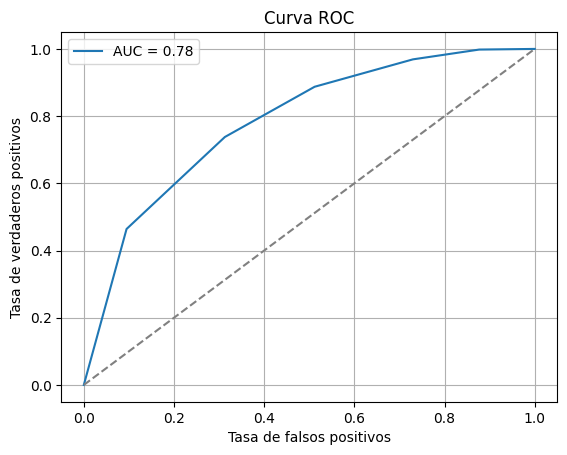

In [142]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = knn.predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC")
plt.legend()
plt.grid(True)
plt.show()

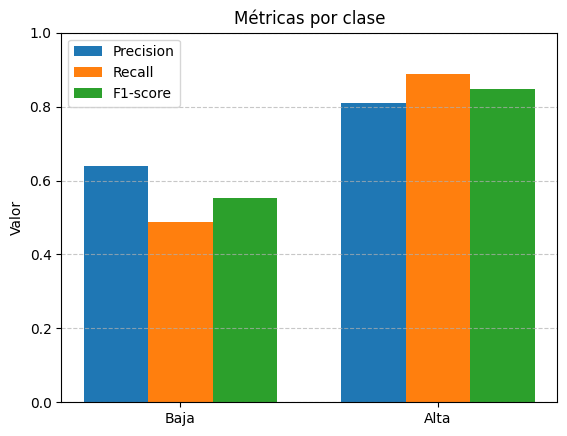

In [143]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

metrics = precision_recall_fscore_support(y_test, y_pred, zero_division=0)
labels = ["Baja", "Alta"]
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
ax.bar(x - width, metrics[0], width, label='Precision')
ax.bar(x, metrics[1], width, label='Recall')
ax.bar(x + width, metrics[2], width, label='F1-score')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)
ax.set_ylabel("Valor")
ax.set_title("Métricas por clase")
ax.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()